# Glioma Grading Clinical and Mutation Features
## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Reading data

In [2]:
glioma_data = pd.read_csv("TCGA_InfoWithGrade.csv")

## Separating data into training and test

In [3]:
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



values = glioma_data[
    [
        "Gender",
        "Age_at_diagnosis",
        "Race",
        "IDH1",
        "TP53",
        "ATRX",
        "PTEN",
        "EGFR",
        "CIC",
        "MUC16",
        "PIK3CA",
        "NF1",
        "PIK3R1",
        "FUBP1",
        "RB1",
        "NOTCH1",
        "BCOR",
        "CSMD3",
        "SMARCA4",
        "GRIN2A",
        "IDH2",
        "FAT4",
        "PDGFRA",
    ]
]

target = glioma_data["Grade"]

(training_values,
 testing_values,
 training_target,
 testing_target) = train_test_split(values, target, test_size=0.25, random_state=1)


  
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    
    # Calculate mean and standard deviation for training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Convert scores to errors
    train_error_mean = 1 - train_scores_mean
    train_error_std = train_scores_std
    test_error_mean = 1 - test_scores_mean
    test_error_std = test_scores_std

    plt.grid()

    # Fill between for confidence intervals
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation Score")

    plt.legend(loc="best")
    return plt





# K-Nearest Neighbours

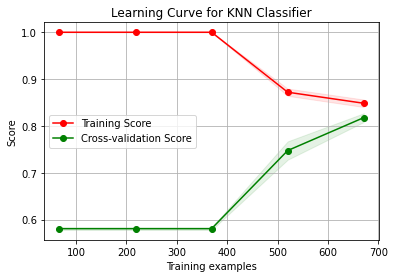

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       115
           1       0.78      0.73      0.75        95

    accuracy                           0.78       210
   macro avg       0.78      0.78      0.78       210
weighted avg       0.78      0.78      0.78       210



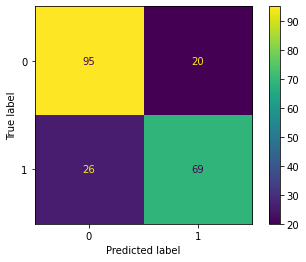

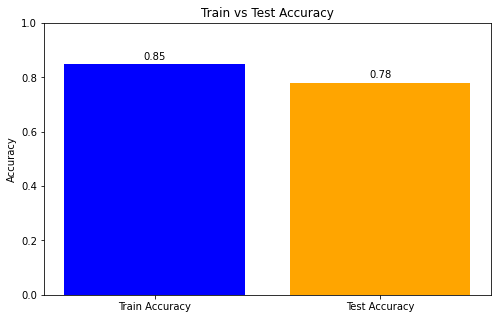

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

##knn_default = KNeighborsClassifier()

##param_grid = {'n_neighbors': np.arange(1, 30)}


##knn = GridSearchCV(knn_default, param_grid, cv=5)

knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(training_values, training_target)

target_pred_test = knn.predict(testing_values)
target_pred_train = knn.predict(training_values)

accuracy = accuracy_score(testing_target, target_pred_test)
accuracy_train = accuracy_score(training_target, target_pred_train)

#best_k = knn.best_params_['n_neighbors']
#print(f"Best k: {best_k}")

plot_learning_curve(knn, "Learning Curve for KNN Classifier", values, target, cv=5, n_jobs=-1)

# Show the plot
plt.show()


print(classification_report(testing_target, target_pred_test))

disp = ConfusionMatrixDisplay(confusion_matrix(testing_target, target_pred_test))
disp.plot()

# Plot accuracies
labels = ['Train Accuracy', 'Test Accuracy']
accuracies = [accuracy_train, accuracy]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.ylim(0, 1)  # Accuracies are between 0 and 1
for i in range(len(labels)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center', va='bottom')
plt.show()


## SVM
### Linear kernel

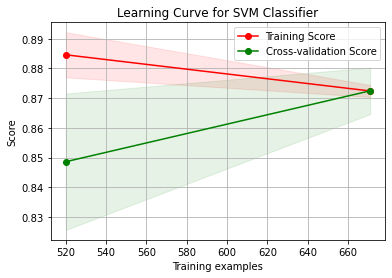

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       115
           1       0.82      0.89      0.85        95

    accuracy                           0.86       210
   macro avg       0.86      0.86      0.86       210
weighted avg       0.87      0.86      0.86       210



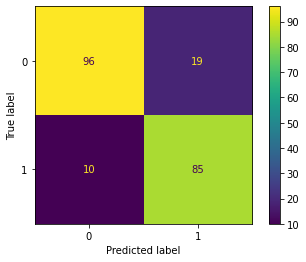

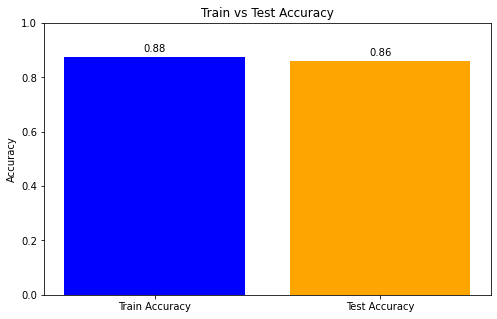

In [16]:
from sklearn.svm import SVC

svm_model = SVC(kernel="linear")

svm_model.fit(training_values, training_target)

target_pred_test = svm_model.predict(testing_values)
target_pred_train = svm_model.predict(training_values)

accuracy = accuracy_score(testing_target, target_pred_test)
accuracy_train = accuracy_score(training_target, target_pred_train)

plot_learning_curve(svm_model, "Learning Curve for SVM Classifier", values, target, cv=5, n_jobs=-1)

# Show the plot
plt.show()


print(classification_report(testing_target, target_pred_test))

disp = ConfusionMatrixDisplay(confusion_matrix(testing_target, target_pred_test))
disp.plot()

# Plot accuracies
labels = ['Train Accuracy', 'Test Accuracy']
accuracies = [accuracy_train, accuracy]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.ylim(0, 1)  # Accuracies are between 0 and 1
for i in range(len(labels)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center', va='bottom')
plt.show()

### Sigmoid kernel

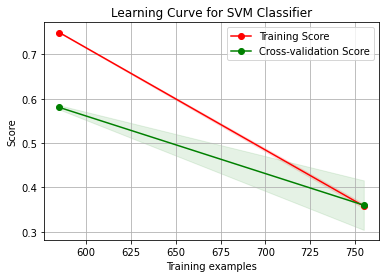

              precision    recall  f1-score   support

           0       0.44      0.53      0.48       115
           1       0.24      0.18      0.20        95

    accuracy                           0.37       210
   macro avg       0.34      0.35      0.34       210
weighted avg       0.35      0.37      0.36       210



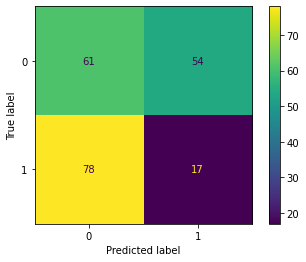

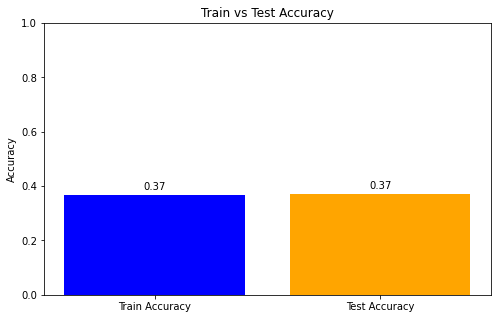

In [17]:
svm_model = SVC(kernel="sigmoid")

svm_model.fit(training_values, training_target)

target_pred_test = svm_model.predict(testing_values)
target_pred_train = svm_model.predict(training_values)

accuracy = accuracy_score(testing_target, target_pred_test)
accuracy_train = accuracy_score(training_target, target_pred_train)

plot_learning_curve(svm_model, "Learning Curve for SVM Classifier", values, target, cv=10, n_jobs=-1)

# Show the plot
plt.show()


print(classification_report(testing_target, target_pred_test))

disp = ConfusionMatrixDisplay(confusion_matrix(testing_target, target_pred_test))
disp.plot()

# Plot accuracies
labels = ['Train Accuracy', 'Test Accuracy']
accuracies = [accuracy_train, accuracy]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.ylim(0, 1)  # Accuracies are between 0 and 1
for i in range(len(labels)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center', va='bottom')
plt.show()

### Polynomial kernel

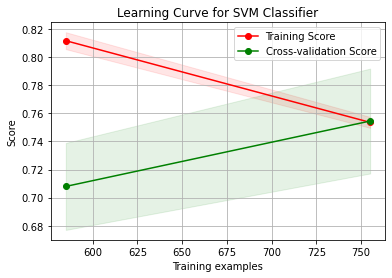

              precision    recall  f1-score   support

           0       0.68      0.83      0.75       115
           1       0.72      0.52      0.60        95

    accuracy                           0.69       210
   macro avg       0.70      0.68      0.67       210
weighted avg       0.70      0.69      0.68       210



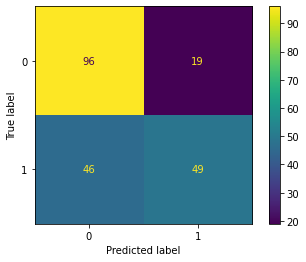

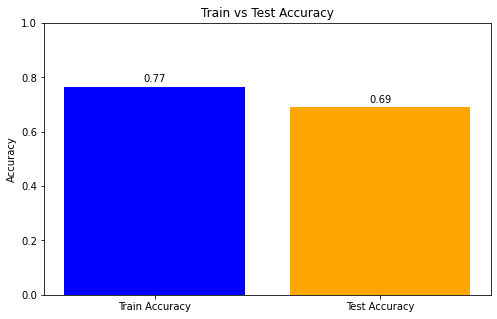

In [18]:
svm_model = SVC(kernel="poly")

svm_model.fit(training_values, training_target)

target_pred_test = svm_model.predict(testing_values)
target_pred_train = svm_model.predict(training_values)

accuracy = accuracy_score(testing_target, target_pred_test)
accuracy_train = accuracy_score(training_target, target_pred_train)

plot_learning_curve(svm_model, "Learning Curve for SVM Classifier", values, target, cv=10, n_jobs=-1)

# Show the plot
plt.show()


print(classification_report(testing_target, target_pred_test))

disp = ConfusionMatrixDisplay(confusion_matrix(testing_target, target_pred_test))
disp.plot()

# Plot accuracies
labels = ['Train Accuracy', 'Test Accuracy']
accuracies = [accuracy_train, accuracy]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.ylim(0, 1)  # Accuracies are between 0 and 1
for i in range(len(labels)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center', va='bottom')
plt.show()

### Radial Basis Function kernel

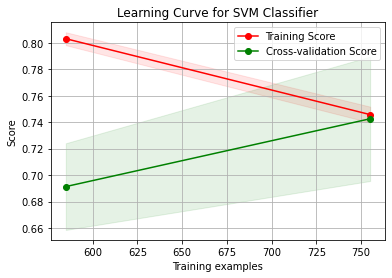

              precision    recall  f1-score   support

           0       0.68      0.82      0.74       115
           1       0.71      0.54      0.61        95

    accuracy                           0.69       210
   macro avg       0.69      0.68      0.68       210
weighted avg       0.69      0.69      0.68       210



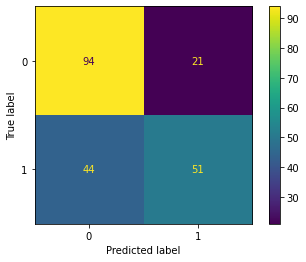

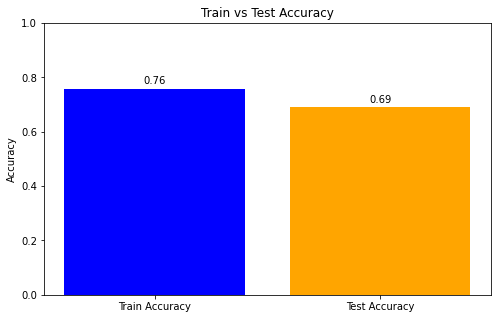

In [19]:
svm_model = SVC(kernel="rbf")

svm_model.fit(training_values, training_target)

target_pred_test = svm_model.predict(testing_values)
target_pred_train = svm_model.predict(training_values)

accuracy = accuracy_score(testing_target, target_pred_test)
accuracy_train = accuracy_score(training_target, target_pred_train)

plot_learning_curve(svm_model, "Learning Curve for SVM Classifier", values, target, cv=10, n_jobs=-1)

# Show the plot
plt.show()


print(classification_report(testing_target, target_pred_test))

disp = ConfusionMatrixDisplay(confusion_matrix(testing_target, target_pred_test))
disp.plot()

# Plot accuracies
labels = ['Train Accuracy', 'Test Accuracy']
accuracies = [accuracy_train, accuracy]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.ylim(0, 1)  # Accuracies are between 0 and 1
for i in range(len(labels)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center', va='bottom')
plt.show()

## Decision trees

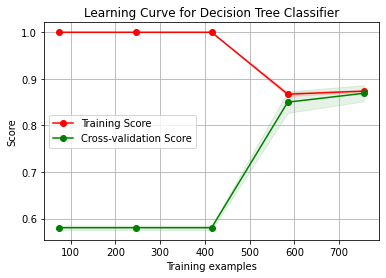

              precision    recall  f1-score   support

           0       0.68      0.82      0.74       115
           1       0.71      0.54      0.61        95

    accuracy                           0.69       210
   macro avg       0.69      0.68      0.68       210
weighted avg       0.69      0.69      0.68       210



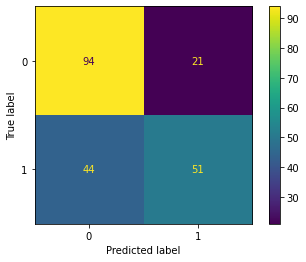

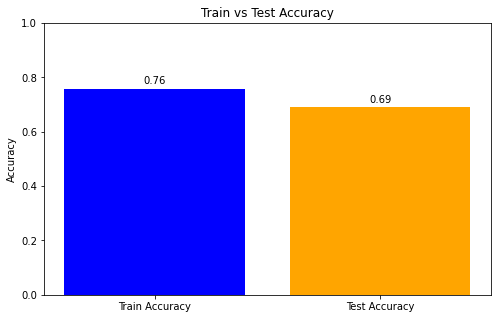

In [20]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=3)

#param_grid = {'max_depth': np.arange(1, 10)}

#decision_tree = GridSearchCV(decision_tree_default, param_grid, cv=5)

decision_tree.fit(training_values, training_target)

target_pred_test = svm_model.predict(testing_values)
target_pred_train = svm_model.predict(training_values)

accuracy = accuracy_score(testing_target, target_pred_test)
accuracy_train = accuracy_score(training_target, target_pred_train)

#print(f"Best max_depth: {decision_tree.best_params_['max_depth']}")

plot_learning_curve(decision_tree, "Learning Curve for Decision Tree Classifier", values, target, cv=10, n_jobs=-1)

# Show the plot
plt.show()


print(classification_report(testing_target, target_pred_test))

disp = ConfusionMatrixDisplay(confusion_matrix(testing_target, target_pred_test))
disp.plot()

# Plot accuracies
labels = ['Train Accuracy', 'Test Accuracy']
accuracies = [accuracy_train, accuracy]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.ylim(0, 1)  # Accuracies are between 0 and 1
for i in range(len(labels)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center', va='bottom')
plt.show()

## Random Forests

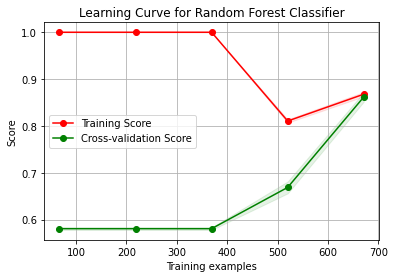

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       115
           1       0.81      0.82      0.82        95

    accuracy                           0.83       210
   macro avg       0.83      0.83      0.83       210
weighted avg       0.83      0.83      0.83       210

[[97 18]
 [17 78]]


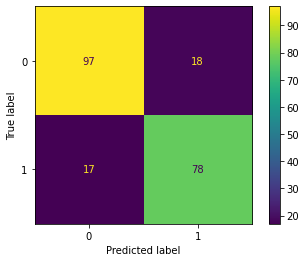

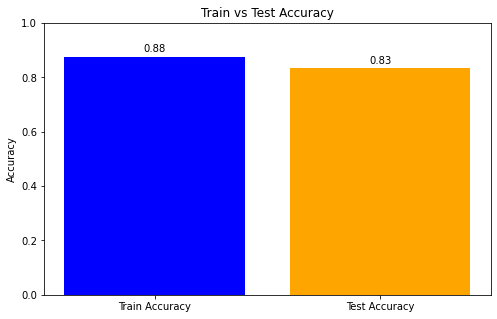

In [8]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=501, max_depth=2, random_state=1)

# Fit the model
random_forest.fit(training_values, training_target)

# Predict
training_target_pred = random_forest.predict(training_values)
test_target_pred = random_forest.predict(testing_values)

# Plot the learning curve (assuming plot_learning_curve is already defined)
plot_learning_curve(random_forest, "Learning Curve for Random Forest Classifier", values, target, cv=5, n_jobs=-1)
plt.show()

# Calculate accuracies
train_accuracy = accuracy_score(training_target, training_target_pred)
test_accuracy = accuracy_score(testing_target, test_target_pred)


# Print classification report
print(classification_report(testing_target, test_target_pred))

# Print confusion matrix
print(confusion_matrix(testing_target, test_target_pred))
disp = ConfusionMatrixDisplay(confusion_matrix(testing_target, test_target_pred))
disp.plot()

# Plot accuracies
labels = ['Train Accuracy', 'Test Accuracy']
accuracies = [train_accuracy, test_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.ylim(0, 1)  # Accuracies are between 0 and 1
for i in range(len(labels)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center', va='bottom')
plt.show()

